In [9]:
suppressPackageStartupMessages(library(extraDistr))
suppressPackageStartupMessages(library(distr))
source("./simple.R")
source("./simple_utils.R")
set.seed(2024)

### Q1

In [4]:
success_indicators = c(1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1)

In [21]:
# (1)
logistic_regression = function() {
  n = length(success_indicators)
  intercept = simulate(Norm(0, 1))
  slope = simulate(Norm(0, 1))
  thetas = plogis(intercept + slope * (1:n))
  for (i in (1:n)) {
    observe(success_indicators[i], Bern(thetas[i]))
  } 
  theta_next = plogis(intercept + slope * (n + 1))
  y_next = simulate(Bern(theta_next))
  return (c(intercept, slope, y_next))
}

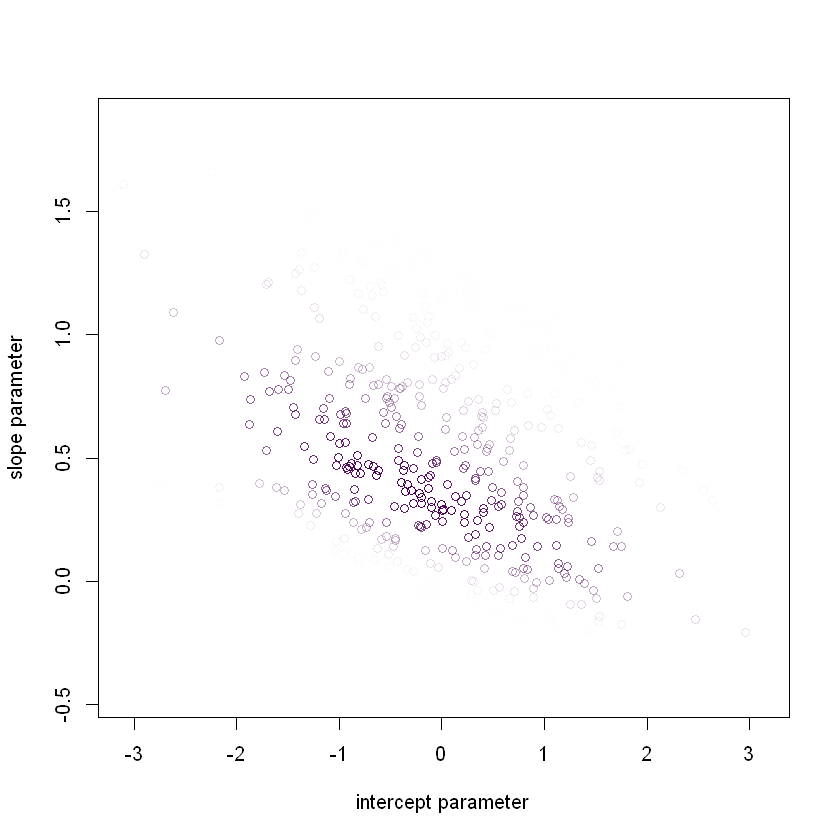

In [7]:
# (2)
posterior = posterior_particles(logistic_regression, 1000)
weighted_scatter_plot(posterior, plot_options = list(xlab="intercept parameter", ylab="slope parameter"))


In [24]:
# (3)
post_obj = posterior(logistic_regression, 1000)
intercept = post_obj[1]
slope = post_obj[2]
pred = post_obj[3]
pred

[1] 0.9547163

In [12]:
# (4)
logistic_regression_2 = function() {
  n = length(success_indicators)
  intercept = simulate(Norm(0, 1))
  theta = plogis(intercept)
  for (i in (1:n)) {
    observe(success_indicators[i], Bern(theta))
  }
  y_next = simulate(Bern(theta))
  return (c(intercept, y_next))
}

In [13]:
(posterior(logistic_regression_2, 1000))[2]

[1] 0.730559

### Q2

model is random chosen in $$\{0,1\}$$ and the prior on the model variable is $$\frac12$$
if model = 1, then use model with slope and if model = 0, then use the mdel with no slope


In [25]:
unified_model = function() {
    # model ~ unif({0,1}) and it represents if we choose the model with slope(=1), or without slope(=0)
    model = simulate(Bern(1 / 2))
    if (model == 1) {
        logistic_regression()
    }
    else {
        logistic_regression_2()
    }
    return(model)
}
posterior(unified_model, 1000)

[1] 0.533341